In [2]:
import numpy as np
import nilearn
from nilearn import plotting, image, datasets
import nibabel

/home/ltetrel/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
filepath = "/home/ltetrel/Documents/data/mncToNifti1/PreventAD_108583_NAPFU24_adniT1_001.mnc"
#nibabel.load(filepath)
#plotting.view_img(nilearn.image.mean_img(filepath))

img = image.load_img(filepath)
print(img.shape)
print(img.affine)

(176, 256, 240)
[[ 9.95075757e-01 -6.55896594e-02  7.43117447e-02 -9.14707802e+01]
 [ 8.32033522e-02  1.45314313e-01 -9.85880800e-01  1.10762314e+02]
 [-5.38650259e-02 -9.87209070e-01 -1.50056029e-01  1.14344996e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [4]:
filepath = "/home/ltetrel/Documents/data/mncToNifti1/PreventAD_108583_NAPFU24_adniT1_001.nii"
#nibabel.load(filepath)
#plotting.view_img(nilearn.image.mean_img(filepath))

img = image.load_img(filepath)
print(img.shape)
print(img.affine)

(176, 240, 256)
[[ 9.95075762e-01  7.43117481e-02 -6.55896589e-02 -9.14707794e+01]
 [ 8.32033530e-02 -9.85880792e-01  1.45314306e-01  1.10762314e+02]
 [-5.38650267e-02 -1.50056034e-01 -9.87209082e-01  1.14344994e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [5]:
sub = 108583

## view 4d images

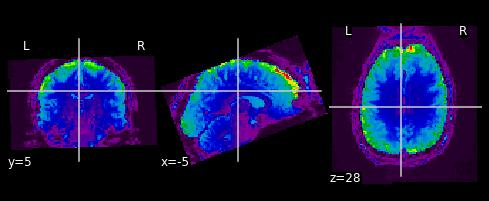

In [11]:
filepath_nii = "/home/ltetrel/Documents/data/neuromod/sub-05/ses-vid001/func/sub-05_ses-vid001_task-life_run-05_bold.nii.gz"
img = image.load_img(filepath_nii)
plotting.plot_epi(image.mean_img(img))

## index 4d images into 3d images

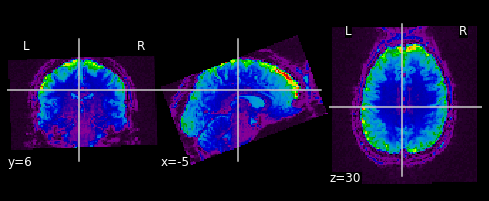

In [14]:
# https://nilearn.github.io/modules/generated/nilearn.image.index_img.html#nilearn.image.index_img
filepath_nii = "/home/ltetrel/Documents/data/neuromod/sub-05/ses-vid001/func/sub-05_ses-vid001_task-life_run-05_bold.nii.gz"
img = image.load_img(filepath_nii)
epi_img = image.index_img(img, 1)
plotting.plot_epi(epi_img)

# Preprocessed .nii from fmriprep

In [6]:
filepath_nii_preproc = "/home/ltetrel/Documents/data/preventad_prep/fmriprep/sub-%d/ses-BL00/func/sub-%d_ses-BL00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz" %(sub,sub)

img = image.load_img(filepath_nii_preproc)
print(img.shape)
print(img.affine)

plotting.view_img(nilearn.image.mean_img(filepath_nii_preproc))

(49, 58, 49, 150)
[[   4.    0.    0.  -96.]
 [   0.    4.    0. -132.]
 [   0.    0.    4.  -78.]
 [   0.    0.    0.    1.]]


# .nii input

In [108]:
filepath_nii = "/home/ltetrel/Documents/data/preventad_prep/sub-%d/ses-BL00/func/sub-%d_ses-BL00_task-rest_bold.nii" %(sub,sub)
#filpeath = "/home/ltetrel/Documents/data/preventad_prep/fmriprep/sub-%d/ses-BL00/func/PreventAD_%d_NAPBL00_Resting_001.mnc" %(sub,sub)

#plotting.view_img(nilearn.image.mean_img(filepath))

img = nibabel.load(filepath_nii)

EPI_to_MNI =  np.eye(4)
EPI_to_MNI[0:3,:] = np.array([[1.0450357663806, 0.0912023768291296, -0.0771669892519054, 2.9492117730667],
 [-0.0610279892590097, 1.04501925511502, 0.408617743421651, -13.1485629351834],
 [0.117771925045863, -0.421823805419415, 1.09638245343511, 12.5093890663384]])

EPI_to_MNI = EPI_to_MNI @ img.affine
print(img.shape)
print(img.affine)
imgT = nibabel.nifti1.Nifti1Image(img.get_data(), EPI_to_MNI)

plotting.view_img(nilearn.image.mean_img(imgT), opacity=0.9, bg_img = nilearn.image.mean_img(filepath_nii_preproc))

(64, 64, 32, 150)
[[  0.41607162  -3.95865679  -0.39486837 116.68450928]
 [ -3.91942692  -0.47594067   0.64153898 140.11871338]
 [ -0.68189162   0.32018292  -3.92842293  78.19780731]
 [  0.           0.           0.           1.        ]]


/home/ltetrel/.local/lib/python3.6/site-packages/nilearn/plotting/js_plotting_utils.py:103: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than 10 '


# EPI to T1

In [26]:
filepath = "/home/ltetrel/Documents/data/preventad_prep/fmriprep/sub-%d/ses-BL00/func/sub-%d_ses-BL00_task-rest_space-T1w_desc-aseg_dseg.nii.gz" %(sub,sub)

plotting.view_img(nilearn.image.mean_img(filepath))

#img = image.load_img(filepath)
#print(img.shape)
#print(img.affine)

# T1w

In [ ]:
filepath = "/home/ltetrel/Documents/data/preventad_prep/sub-%d/ses-BL00/anat/sub-%d_ses-BL00_T1w.nii" %(sub,sub)

plotting.view_img(filepath)

#img = image.load_img(filepath)
#print(img.shape)
#print(img.affine)

# T1w preproc

In [49]:
filepath = "/home/ltetrel/Documents/data/preventad_prep/fmriprep/sub-%d/anat/sub-%d_desc-preproc_T1w.nii.gz" %(sub,sub)

#plotting.view_img(filepath)

#img = image.load_img(filepath)
#print(img.shape)
#print(img.affine)

ValueError: Type not handled: <class 'numpy.bool_'>

# MNI template

In [104]:
filepath = datasets.MNI152_FILE_PATH
#plotting.view_img(nilearn.image.mean_img(filepath))

img = image.load_img(filepath)
print(img.shape)
print(img.affine)

(91, 109, 91)
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]


In [ ]:
filepath = "/home/ltetrel/Documents/data/preventad_prep/fmriprep/sub-%d/ses-BL00/func/sub-%d_ses-BL00_task-rest_space-MNI152NLin2009cAsym_boldref.nii.gz" %(sub,sub)
#plotting.view_img(nilearn.image.mean_img(filepath))

img = image.load_img(filepath)
print(img.shape)
print(img.affine)